In [1]:
%matplotlib ipympl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Import own code
from interactive_trigger_class import InteractiveTrigger
from algorithms import *

sb.set()

SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"  # Nasty noise
SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"  # Nice noise
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"
XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"


In [2]:
lis = np.arange(2, 20, 4)
list(cfd(lis))


[2, 6, 10, 14, 18]

In [3]:
data = {}
# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
# data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

# df = pd.read_csv("../data/SX1+XN1.csv")
# data["SX1+XN1"] = [df.t, df.signal]
df = pd.read_csv("../data/SX1+XN2.csv")
data["SX1+XN2"] = [df.t, df.signal]

SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
SX1_truth_data = SX1_truth_data_df.truth_data


Label(value='Hitrate: 1.0')

Label(value='Misfire rate: 0.6896551724137931')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

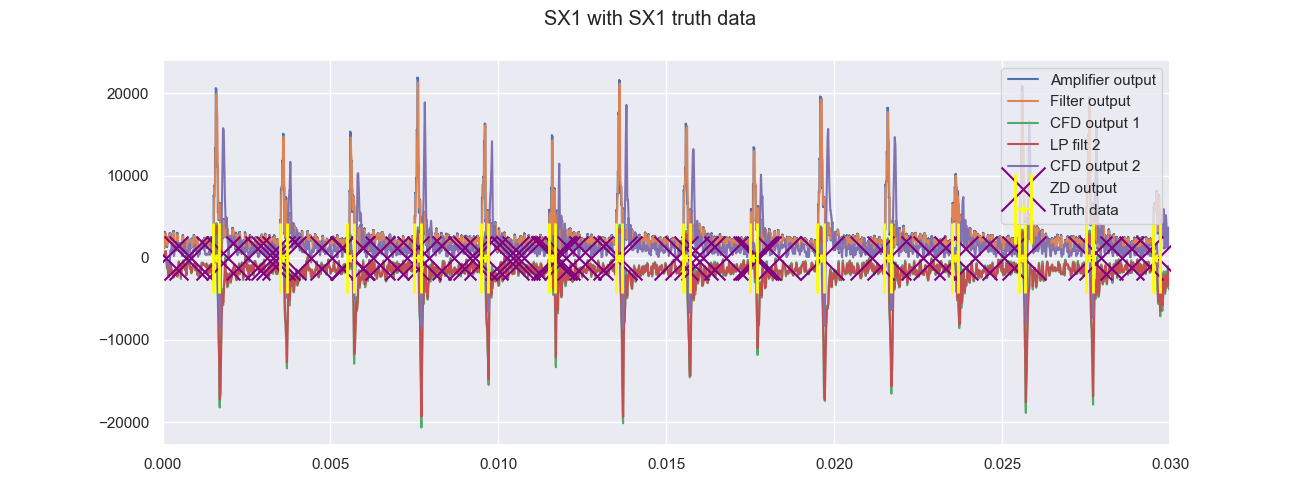

In [4]:
image1 = InteractiveTrigger(
        *data["SX1"],
        truth_data = SX1_truth_data,
        title = "SX1 with SX1 truth data",
        slice_end = 30_000,
    )
image1.show()


Label(value='Hitrate: 0.46123260437375746')

Label(value='Misfire rate: 0.18213058419243985')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

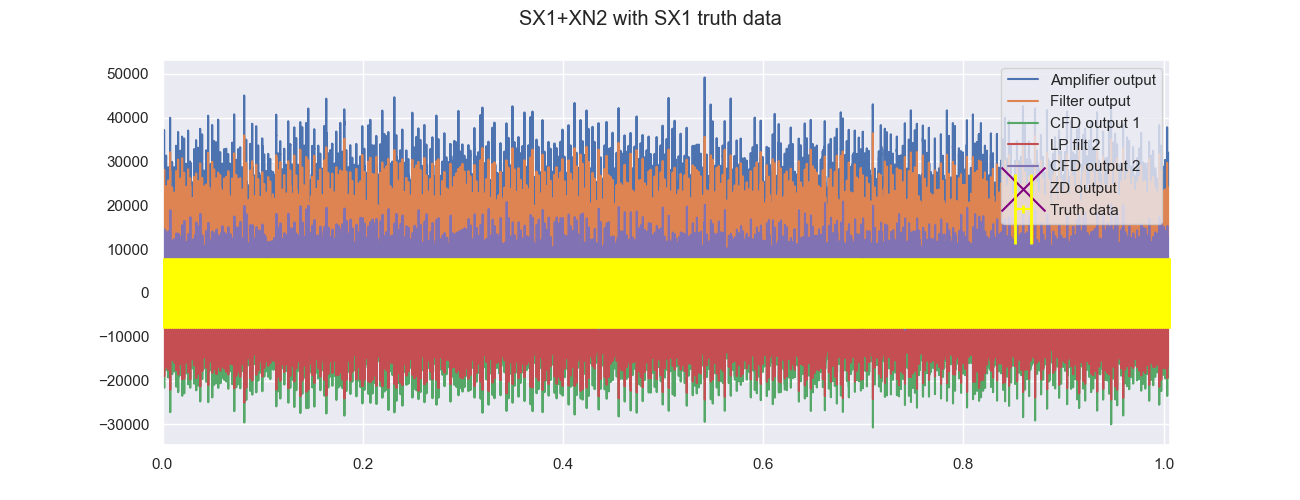

In [5]:
image2 = InteractiveTrigger(
        *data["SX1+XN2"],
        truth_data = SX1_truth_data,
        inv_frac = 3,
        filter_alg = lp_filter_iir_wrapper(DECAY_FULL_POWER=10, DECAY_PART=990),
        title = "SX1+XN2 with SX1 truth data",
        tolerance = 300e-6,
    )
image2.show()


Label(value='Hitrate: 0.06666666666666667')

Label(value='Misfire rate: 0.5')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

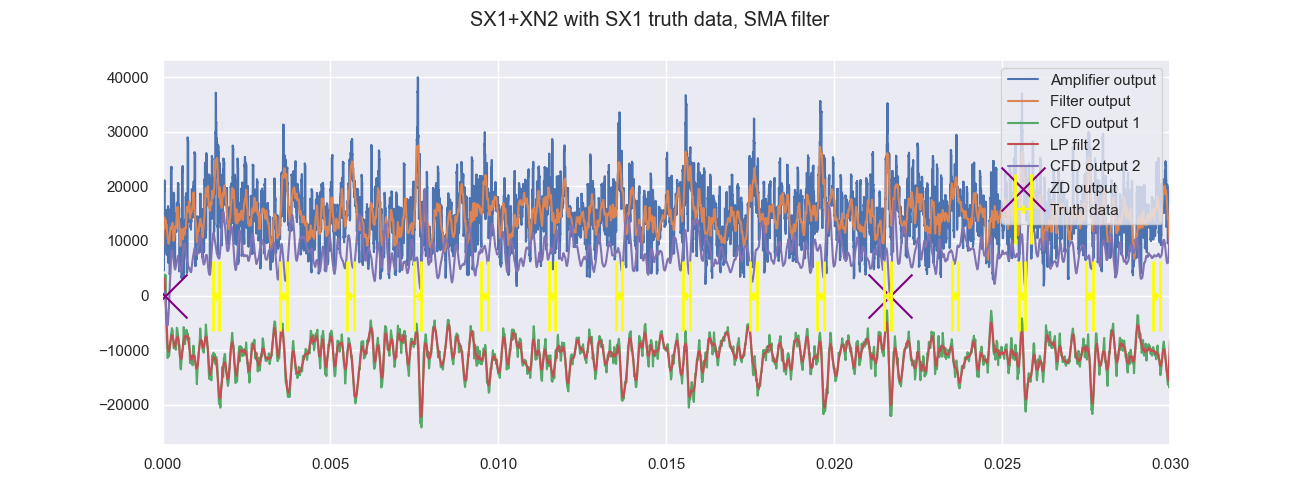

In [6]:
image2_2 = InteractiveTrigger(
        *data["SX1+XN2"],
        truth_data = SX1_truth_data,
        filter_alg=sma,
        title = "SX1+XN2 with SX1 truth data, SMA filter",
        slice_end = 30_000,
    )
image2_2.show()


Label(value='Hitrate: 0.06666666666666667')

Label(value='Misfire rate: 0.6666666666666666')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

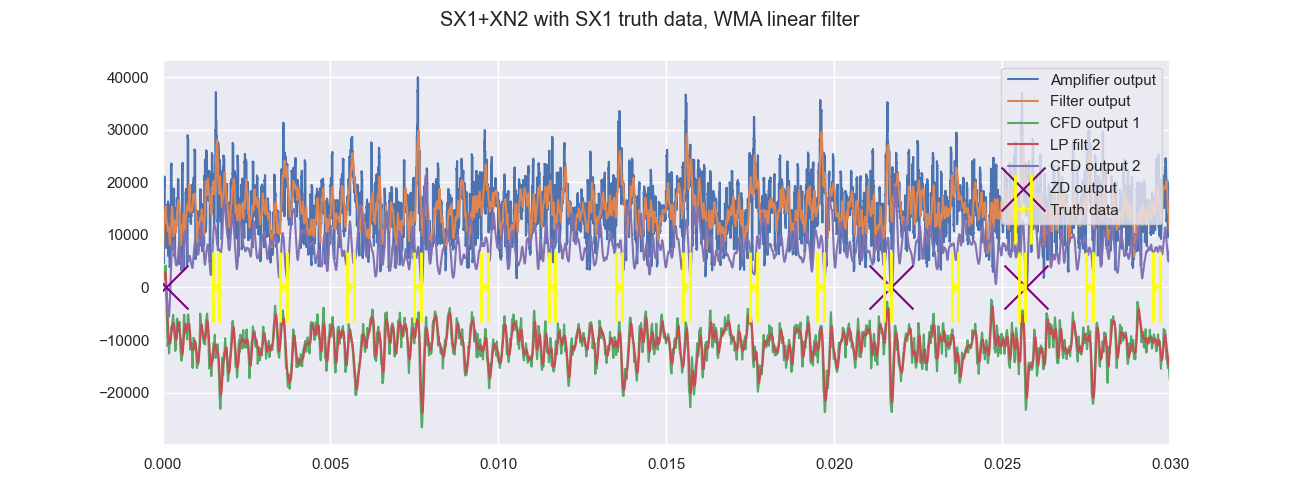

In [7]:
image2_3 = InteractiveTrigger(
        *data["SX1+XN2"],
        truth_data = SX1_truth_data,
        filter_alg=wma_linear,
        title = "SX1+XN2 with SX1 truth data, WMA linear filter",
        slice_end = 30_000,
    )
image2_3.show()


Label(value='Hitrate: 0.0')

Label(value='Misfire rate: 1.0')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

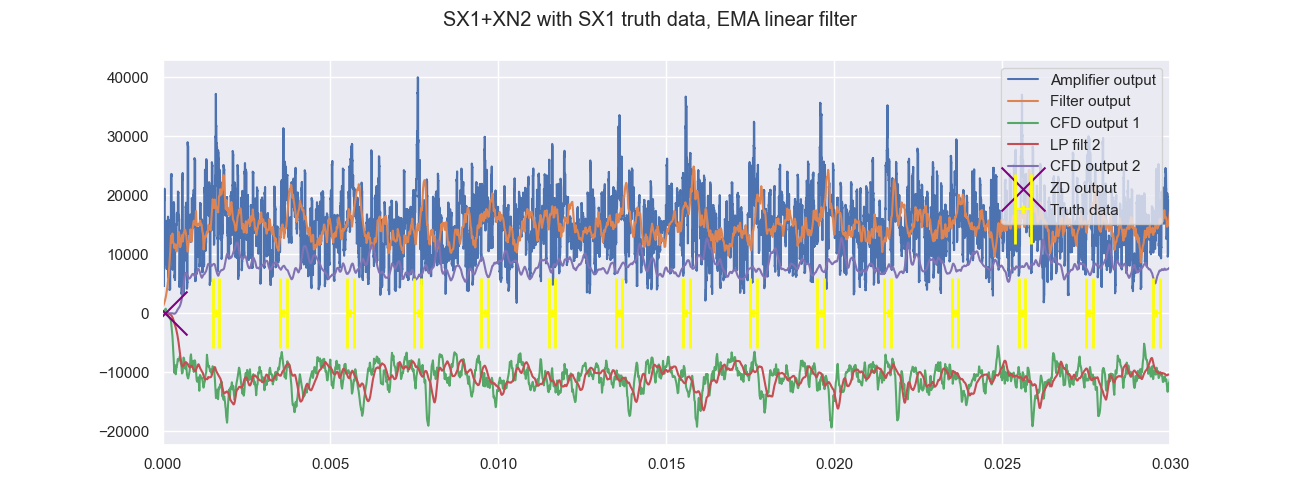

In [8]:
image2_4 = InteractiveTrigger(
        *data["SX1+XN2"],
        truth_data = SX1_truth_data,
        filter_alg=ema_wrapper(n=500, alpha=0.01),
        title = "SX1+XN2 with SX1 truth data, EMA linear filter",
        slice_end = 30_000,
    )
image2_4.show()


Label(value='Hitrate: None')

Label(value='Misfire rate: 1.0')

interactive(children=(IntSlider(value=100, description='Delay samples', layout=Layout(width='50%'), max=300, s…

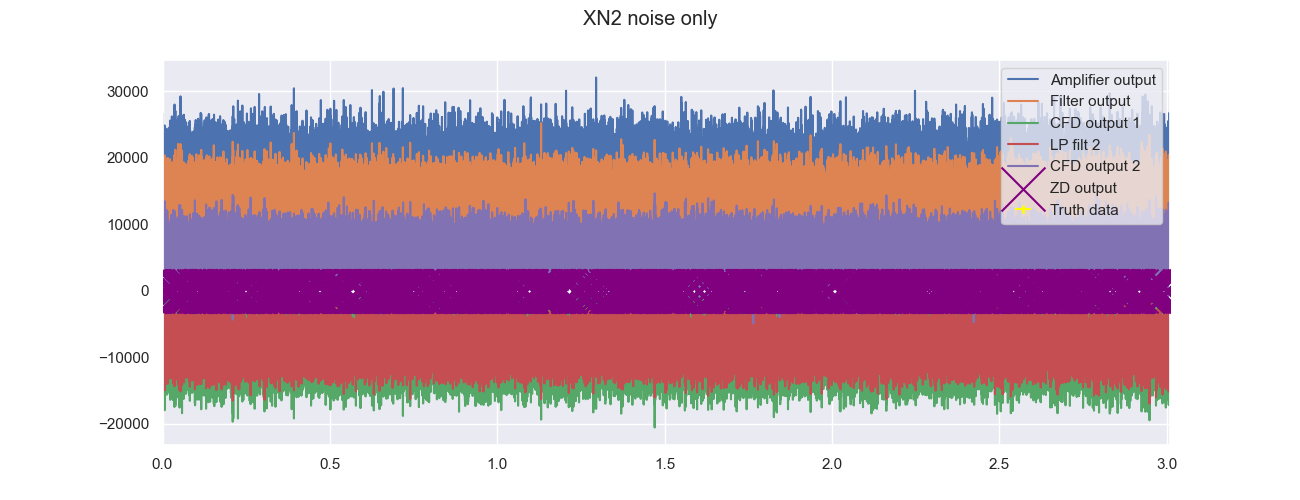

In [10]:
image3 = InteractiveTrigger(
        *data["XN2"],
        title = "XN2 noise only",
        inv_frac = 3,
        filter_alg = lp_filter_iir_wrapper(DECAY_FULL_POWER=10, DECAY_PART=990),
        # tolerance = 300e-6,
    )
image3.show()
